## Observations and Insights 

In [226]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_pharma_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')


# Display the data table for preview
combined_pharma_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [227]:
# Checking the number of mice.
count = combined_pharma_df["Mouse ID"].nunique()
count

249

In [228]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = combined_pharma_df[combined_pharma_df.duplicated(["Mouse ID", "Timepoint"])]
print("Duplicate Rows based on Mouse ID and Timepoint:")
duplicate


Duplicate Rows based on Mouse ID and Timepoint:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [229]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = combined_pharma_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep = "first")
clean = clean.rename(columns={"Tumor Volume (mm3)": "Tumorvolume"})
print("Clean Rows after removing duplicates based on Mouse ID and Timepoint:")
clean


Clean Rows after removing duplicates based on Mouse ID and Timepoint:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumorvolume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [230]:
# Checking the number of mice in the clean DataFrame.
cleanc = clean["Mouse ID"].nunique()
cleanc

249

## Summary Statistics

In [231]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_grouped = clean.groupby(["Drug Regimen"]).mean()["Tumorvolume"]
median_grouped = clean.groupby(["Drug Regimen"]).median()["Tumorvolume"]
var_grouped = clean.groupby(["Drug Regimen"]).var()["Tumorvolume"]
std = clean.groupby(["Drug Regimen"]).std()["Tumorvolume"]
sem_grouped = clean.groupby(["Drug Regimen"]).sem()["Tumorvolume"]
summary1 = pd.DataFrame({"Mean":mean_grouped,"Median":median_grouped, "Variance":var_grouped, "Standard Deviation":std, "SEM":sem_grouped })
summary1


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [232]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary = clean.groupby(["Drug Regimen"]).agg({"Tumorvolume": ["mean", "median", np.var,np.std, "sem"]})
summary.columns=["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

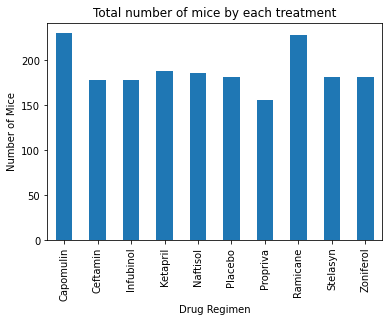

<Figure size 432x288 with 0 Axes>

In [233]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_group = clean.groupby("Drug Regimen")
count_mice = drug_group["Mouse ID"].count()
count_chart = count_mice.plot(kind="bar", title = "Total number of mice by each treatment")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice")
plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

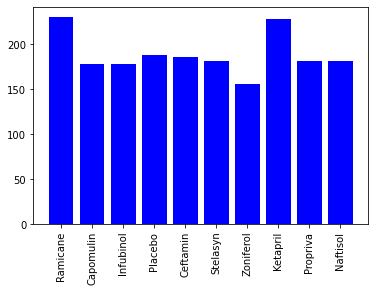

In [234]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.Y
group = clean.groupby(["Drug Regimen"])
group= group["Mouse ID"].count()
drug = clean["Drug Regimen"].unique()
plt.xticks(rotation=90)
plt.bar(drug, group, color ="b")

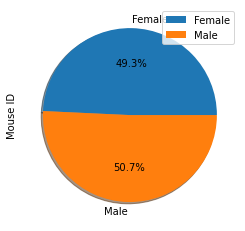

In [235]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean.groupby("Sex").agg({"Mouse ID": "count"}).plot(kind='pie',subplots=True, autopct="%1.1f%%", shadow=True, figsize=(4,4))


([<matplotlib.patches.Wedge at 0x7fe123cb1ca0>,
 [Text(0.025622998006324463, 1.099701533132135, 'Male'),
  Text(-0.025623100967812958, -1.099701530733132, 'Female')],
 [Text(0.013976180730722433, 0.5998371998902553, '49.3%'),
  Text(-0.01397623689153434, -0.5998371985817083, '50.7%')])

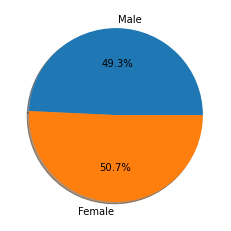

In [236]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean.groupby("Sex")
countmice = gender["Mouse ID"].count()
labels = clean["Sex"].unique()
plt.pie(countmice, labels=labels, autopct="%1.1f%%", shadow=True)

## Quartiles, Outliers and Boxplots

In [237]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
summary1 = clean.groupby("Mouse ID").agg({"Timepoint":"max"})


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(summary1, clean, on=("Mouse ID", "Timepoint"), how="left")

merge_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumorvolume,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [238]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)


merge_df["IsinRegimen"] = merge_df["Drug Regimen"].isin(regimen)
newmerge_df = merge_df[(merge_df.IsinRegimen==True)]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
        
    # Determine outliers using upper and lower bounds

def q1(x):
    return x.quantile(0.25)
def q2(x):
    return x.quantile(0.75)

outlier_df = newmerge_df.groupby("Drug Regimen").agg({"Tumorvolume": ["median",q1,q2]})
outlier_df.columns=["Median", "Lower Quartile", "Upper Quartile"]
outlier_df["IQR"] = (outlier_df["Upper Quartile"] - outlier_df["Lower Quartile"])
outlier_df["Lower Bound"] = (outlier_df["Lower Quartile"] - (1.5*outlier_df["IQR"]))
outlier_df["Upper Bound"] = (outlier_df["Upper Quartile"] + (1.5*outlier_df["IQR"]))
outlier_df

finalmerge_df = pd.merge(outlier_df, newmerge_df, on=("Drug Regimen"), how="left")
finalmerge_df["LB Outlier"] = finalmerge_df["Tumorvolume"]< finalmerge_df["Lower Bound"]
finalmerge_df["UP Outlier"] = finalmerge_df["Tumorvolume"]> finalmerge_df["Upper Bound"]
finalmerge_df.drop(columns=["Sex","Age_months", "Weight (g)","Metastatic Sites", "IsinRegimen"], axis=1, inplace=True)
#finalmerge_df.to_csv("final.csv")

<AxesSubplot:title={'center':'Tumorvolume'}, xlabel='Drug Regimen'>

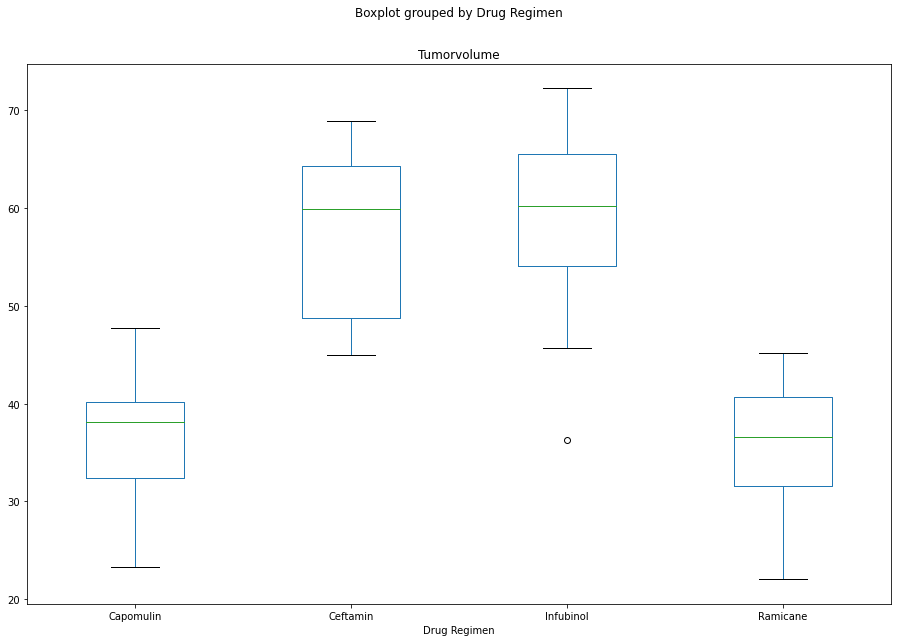

In [239]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finalmerge_df.boxplot(by="Drug Regimen", column="Tumorvolume", figsize=(15,10),grid=False)

## Line and Scatter Plots

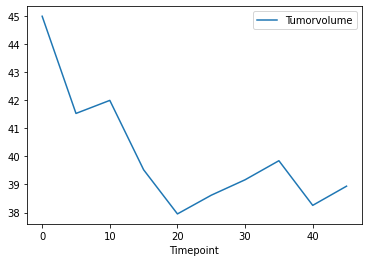

In [261]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
new = (clean[(clean["Drug Regimen"]=="Capomulin") & (clean["Mouse ID"]=="b742")])
line = new.plot(kind="line", x="Timepoint", y="Tumorvolume")


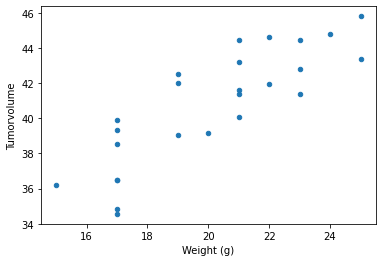

In [241]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

grouped = clean.groupby(["Drug Regimen", "Mouse ID"])
avg = grouped.mean()
drug = "Capomulin"
onedrug = avg.loc["Capomulin"]
tumor_vol_data = onedrug.keys()
scat = onedrug.plot(kind="scatter", x="Weight (g)", y="Tumorvolume")
#new1 = clean.groupby("Drug Regimen")
#avg.filter(lambda x:(x["Drug Regimen"] == "Capomulin").any())
#scat = new1.plot(kind="scatter", x="Weight (g)", y="Tumorvolume")

## Correlation and Regression

The correlation between both factors is 0.84


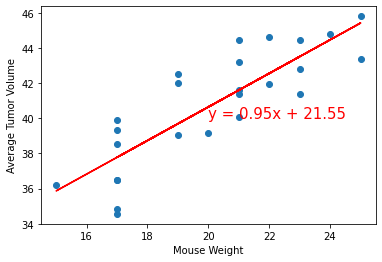

In [258]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = onedrug.iloc[:,1]
tumvol = onedrug.iloc[:,3]
correlation = st.pearsonr(weight, tumvol)
#plt.scatter(weight,tumvol)
#plt.xlabel('Weight per mouse')
#plt.ylabel('Average Tumor Volume')
print(f"The correlation between both factors is {round(correlation[0],2)}")


x_values = onedrug.iloc[:,1]
y_values = onedrug.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumvol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumvol)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()